In [1]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Carga desde un archivo .xlsx sin indice

CredicelDB = pd.read_excel("credicel_excel.xlsx")
CredicelDB

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,fecha_pago_proximo,status_cuenta,puntos,riesgo,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal
0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,NaT,NaN,NaN,NaN,NaN,0.00,0.0,0,0,0
1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,NaT,NaN,NaN,NaN,NaN,0.00,0.0,0,0,0
2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,NaT,NaN,NaN,Cancelado,0.00,0.00,0.0,0,0,NaN
3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,NaT,NaN,NaN,NaN,NaN,0.00,0.0,0,0,0
4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,2022-03-12,Mora,0.0,0,0.00,0.00,0.0,NaN,NaN,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26S,3349.0,297.0,0.0,...,2023-04-25,NaN,NaN,10,27.40,-1.13,0.0,0,"K0,J0,D8,E2",0
22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,Motorola,Moto E22i,26S,4100.0,1209.0,0.0,...,2023-04-25,NaN,NaN,9,19.00,7.48,0.0,0,"K0,J0,D8,E2",0
22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,Samsung,A13,26S,4849.0,1152.0,0.0,...,2023-04-25,NaN,NaN,11,26.65,0.75,0.0,0,"K0,D7,F7,D8",0
22733,22970,PETLF56C,96536,2023-04-18 18:49:08,Samsung,A53 5G,39S,9799.0,2799.0,0.0,...,2023-04-25,NaN,NaN,14,-17.35,-0.14,0.0,0,"J0,G1,E0,E2",0


In [14]:
#Verificamos información del DataFrame
CredicelDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   folio               22735 non-null  int64         
 1   tag                 22735 non-null  object        
 2   folio_solicitud     22735 non-null  int64         
 3   fecha               22735 non-null  datetime64[ns]
 4   marca               22735 non-null  object        
 5   modelo              22735 non-null  object        
 6   plazo               22735 non-null  object        
 7   precio              22735 non-null  float64       
 8   enganche            22735 non-null  float64       
 9   descuento           22735 non-null  float64       
 10  semana              22735 non-null  int64         
 11  monto_financiado    22735 non-null  float64       
 12  costo_total         22735 non-null  int64         
 13  monto_accesorios    22735 non-null  float64   

In [18]:
#Corroboramos valores nulos
ValoresNulos = CredicelDB.isnull().sum()
ValoresNulos

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
precio                   0
enganche                 0
descuento                0
semana                   0
monto_financiado         0
costo_total              0
monto_accesorios         0
agente_venta             0
dis_venta                0
status                   0
fraude                   0
empresa                  0
inversion                0
pagos_realizados         0
reautorizacion           0
fecha_ultimo_pago        0
fecha_pago_proximo       0
status_cuenta            0
puntos                3595
riesgo                   0
porc_enganche         2473
porc_tasa                0
score_buro               0
razones_buro             0
semana_actual            0
codigo_postal            0
dtype: int64

In [19]:
#Sustituir valores nulos con string
CredicelDB["empresa"]= CredicelDB["empresa"].fillna("Desconocido")
CredicelDB["fecha_ultimo_pago"]= CredicelDB["fecha_ultimo_pago"].fillna("Desconocido")
CredicelDB["fecha_pago_proximo"]= CredicelDB["fecha_pago_proximo"].fillna("Desconocido")
CredicelDB["status_cuenta"]= CredicelDB["status_cuenta"].fillna("Desconocido")
CredicelDB["riesgo"]= CredicelDB["riesgo"].fillna("Desconocido")
CredicelDB["razones_buro"]= CredicelDB["razones_buro"].fillna("Desconocido")
CredicelDB["semana_actual"]= CredicelDB["semana_actual"].fillna("Desconocido")
CredicelDB["codigo_postal"]= CredicelDB["codigo_postal"].fillna("Desconocido")

#Sustituir valores nulos con mediana

CredicelDB["puntos"]= CredicelDB["puntos"].fillna(round(CredicelDB["puntos"].median(),1))
CredicelDB["porc_enganche"]= CredicelDB["porc_enganche"].fillna(0)

CredicelDB

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,fecha_pago_proximo,status_cuenta,puntos,riesgo,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal
0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,Desconocido,Desconocido,12.0,Desconocido,0.00,0.00,0.0,0,0,0
1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,Desconocido,Desconocido,12.0,Desconocido,0.00,0.00,0.0,0,0,0
2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,Desconocido,Desconocido,12.0,Cancelado,0.00,0.00,0.0,0,0,Desconocido
3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,Desconocido,Desconocido,12.0,Desconocido,0.00,0.00,0.0,0,0,0
4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,2022-03-12 00:00:00,Mora,0.0,0,0.00,0.00,0.0,Desconocido,Desconocido,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26S,3349.0,297.0,0.0,...,2023-04-25 00:00:00,Desconocido,12.0,10,27.40,-1.13,0.0,0,"K0,J0,D8,E2",0
22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,Motorola,Moto E22i,26S,4100.0,1209.0,0.0,...,2023-04-25 00:00:00,Desconocido,12.0,9,19.00,7.48,0.0,0,"K0,J0,D8,E2",0
22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,Samsung,A13,26S,4849.0,1152.0,0.0,...,2023-04-25 00:00:00,Desconocido,12.0,11,26.65,0.75,0.0,0,"K0,D7,F7,D8",0
22733,22970,PETLF56C,96536,2023-04-18 18:49:08,Samsung,A53 5G,39S,9799.0,2799.0,0.0,...,2023-04-25 00:00:00,Desconocido,12.0,14,-17.35,-0.14,0.0,0,"J0,G1,E0,E2",0


In [20]:
#Corroboramos valores nulos
ValoresNulos = CredicelDB.isnull().sum()
ValoresNulos

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
porc_enganche         0
porc_tasa             0
score_buro            0
razones_buro          0
semana_actual         0
codigo_postal         0
dtype: int64

Outliers

In [26]:
# Hacemos una copia de un data frame limpio
CredicelLimpio = CredicelDB.copy()

In [25]:
CredicelDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   folio               22735 non-null  int64         
 1   tag                 22735 non-null  object        
 2   folio_solicitud     22735 non-null  int64         
 3   fecha               22735 non-null  datetime64[ns]
 4   marca               22735 non-null  object        
 5   modelo              22735 non-null  object        
 6   plazo               22735 non-null  object        
 7   precio              22735 non-null  float64       
 8   enganche            22735 non-null  float64       
 9   descuento           22735 non-null  float64       
 10  semana              22735 non-null  int64         
 11  monto_financiado    22735 non-null  float64       
 12  costo_total         22735 non-null  int64         
 13  monto_accesorios    22735 non-null  float64   

In [27]:
# Elegimos solo los datos cualitativos
CredicelStr = CredicelLimpio.select_dtypes(include=['object'])
CredicelStr

,tag,marca,modelo,plazo,agente_venta,dis_venta,empresa,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,riesgo,razones_buro,semana_actual,codigo_postal
0,HDNAWQ3A,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,microtec,Desconocido,Desconocido,Desconocido,Desconocido,0,0,0
1,M418YNR4,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,microtec,Desconocido,Desconocido,Desconocido,Desconocido,0,0,0
2,SZ7V3NZT,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,microtec,Desconocido,Desconocido,Desconocido,Cancelado,0,0,Desconocido
3,9I08UIQZ,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,microtec,Desconocido,Desconocido,Desconocido,Desconocido,0,0,0
4,JMF4LKYU,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,microtec,2022-03-05 00:00:00,2022-03-12 00:00:00,Mora,0,Desconocido,Desconocido,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,92KQVRIX,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,svc044,servicel,2023-04-18 18:45:00,2023-04-25 00:00:00,Desconocido,10,0,"K0,J0,D8,E2",0
22731,NWB2EA8J,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,2023-04-18 18:46:53,2023-04-25 00:00:00,Desconocido,9,0,"K0,J0,D8,E2",0
22732,VDTRJ2W6,Samsung,A13,26S,Nicolás Jiménez Sánchez,gph008,Desconocido,2023-04-18 18:47:47,2023-04-25 00:00:00,Desconocido,11,0,"K0,D7,F7,D8",0
22733,PETLF56C,Samsung,A53 5G,39S,Maribel Ulibarri Medina,gph014,grupoph,2023-04-18 18:49:08,2023-04-25 00:00:00,Desconocido,14,0,"J0,G1,E0,E2",0


In [28]:
# Elegimos solo los datos cuantitativos
# Separamos los datos cuantitativos también
CredicelNum = CredicelLimpio.select_dtypes(np.number)
CredicelNum

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_enganche,porc_tasa,score_buro
0,3,30,1949.0,780.0,0.0,81,1169.0,2106,0.0,2,0,0,0,0,12.0,0.00,0.00,0.0
1,4,33,2999.0,1050.0,0.0,225,1949.0,2925,0.0,2,0,0,0,0,12.0,0.00,0.00,0.0
2,5,37,1959.0,490.0,0.0,170,1469.0,2210,0.0,3,0,0,0,0,12.0,0.00,0.00,0.0
3,6,38,1959.0,490.0,0.0,170,1469.0,2210,0.0,2,0,0,0,0,12.0,0.00,0.00,0.0
4,7,44,4299.0,1075.0,0.0,178,3224.0,6942,0.0,1,0,0,0,0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,3349.0,297.0,0.0,211,3052.0,5486,0.0,1,0,0,0,0,12.0,27.40,-1.13,0.0
22731,22968,96479,4100.0,1209.0,0.0,200,2891.0,5200,0.0,1,0,0,0,0,12.0,19.00,7.48,0.0
22732,22969,96442,4849.0,1152.0,0.0,256,3697.0,6656,0.0,1,0,0,0,0,12.0,26.65,0.75,0.0
22733,22970,96536,9799.0,2799.0,0.0,386,7000.0,15054,0.0,1,0,0,0,0,12.0,-17.35,-0.14,0.0


<Figure size 1500x800 with 0 Axes>

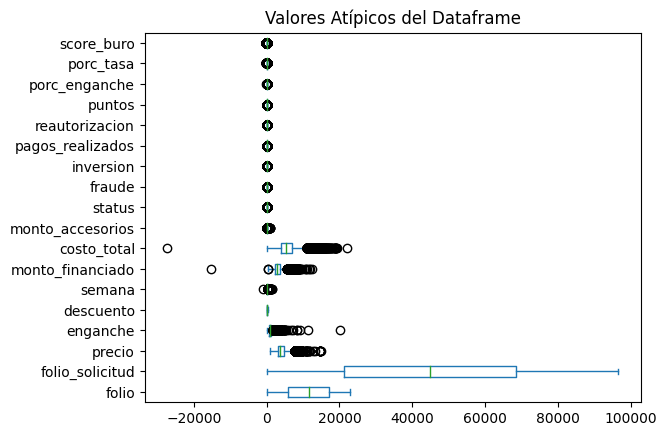

In [29]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
CredicelNum.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [31]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = CredicelNum
percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido folio                34333.50
folio_solicitud     139392.00
precio                7674.00
enganche              1841.75
descuento              500.00
semana                 457.50
monto_financiado      5703.00
costo_total          11108.50
monto_accesorios         0.00
status                   1.00
fraude                   0.00
inversion                0.00
pagos_realizados        34.50
reautorizacion           0.00
puntos                  16.00
porc_enganche            5.23
porc_tasa                0.00
score_buro               0.00
dtype: float64
Limite inferior permitido folio              -11290.50
folio_solicitud    -49692.00
precio                274.00
enganche             -104.25
descuento            -300.00
semana                 -2.50
monto_financiado      359.00
costo_total          -175.50
monto_accesorios        0.00
status                  1.00
fraude                  0.00
inversion               0.00
pagos_realizados      -17.50
reautorizacion  

In [33]:
#Encontramos Outliers del Dataframe
outliers_iqr= CredicelNum[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_enganche,porc_tasa,score_buro
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.40,-1.13,NaN
22731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,7.48,NaN
22732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.65,0.75,NaN
22733,NaN,NaN,9799.0,2799.0,NaN,NaN,7000.0,15054.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.35,-0.14,NaN


In [34]:
#Obtenemos datos limpios del Dataframe
data3_iqr= CredicelNum[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_enganche,porc_tasa,score_buro
0,3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,NaN,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
1,4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,NaN,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
2,5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,NaN,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
3,6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,NaN,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
4,7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,0.0
22731,22968,96479,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,0.0
22732,22969,96442,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,0.0
22733,22970,96536,NaN,NaN,0.0,386.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,0.0


In [35]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

folio                  0
folio_solicitud        0
precio               309
enganche             871
descuento              0
semana               946
monto_financiado     497
costo_total          787
monto_accesorios    1854
status              5649
fraude              1701
inversion           5379
pagos_realizados     534
reautorizacion       774
puntos              4614
porc_enganche       1917
porc_tasa           3044
score_buro          1806
dtype: int64

In [36]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_enganche,porc_tasa,score_buro
0,3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
1,4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
2,5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
3,6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
4,7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0.0,0.0,0.0,0.0,11.7,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,-0.5,0.0,0.0
22731,22968,96479,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,-0.5,0.0,0.0
22732,22969,96442,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,-0.5,0.0,0.0
22733,22970,96536,3935.5,866.9,0.0,386.0,3001.8,5448.5,0.0,1.0,0.0,0.0,0.0,0.0,12.0,-0.5,0.0,0.0


In [37]:
# Unimos los datos cuantitativos al dataframe

Datos_limpios = pd.concat([CredicelStr, data4_iqr], axis=1)
Datos_limpios

,tag,marca,modelo,plazo,agente_venta,dis_venta,empresa,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,...,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_enganche,porc_tasa,score_buro
0,HDNAWQ3A,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,microtec,Desconocido,Desconocido,Desconocido,...,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
1,M418YNR4,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,microtec,Desconocido,Desconocido,Desconocido,...,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
2,SZ7V3NZT,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,microtec,Desconocido,Desconocido,Desconocido,...,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
3,9I08UIQZ,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,microtec,Desconocido,Desconocido,Desconocido,...,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
4,JMF4LKYU,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,microtec,2022-03-05 00:00:00,2022-03-12 00:00:00,Mora,...,0.0,1.0,0.0,0.0,0.0,0.0,11.7,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,92KQVRIX,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,svc044,servicel,2023-04-18 18:45:00,2023-04-25 00:00:00,Desconocido,...,0.0,1.0,0.0,0.0,0.0,0.0,12.0,-0.5,0.0,0.0
22731,NWB2EA8J,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,2023-04-18 18:46:53,2023-04-25 00:00:00,Desconocido,...,0.0,1.0,0.0,0.0,0.0,0.0,12.0,-0.5,0.0,0.0
22732,VDTRJ2W6,Samsung,A13,26S,Nicolás Jiménez Sánchez,gph008,Desconocido,2023-04-18 18:47:47,2023-04-25 00:00:00,Desconocido,...,0.0,1.0,0.0,0.0,0.0,0.0,12.0,-0.5,0.0,0.0
22733,PETLF56C,Samsung,A53 5G,39S,Maribel Ulibarri Medina,gph014,grupoph,2023-04-18 18:49:08,2023-04-25 00:00:00,Desconocido,...,0.0,1.0,0.0,0.0,0.0,0.0,12.0,-0.5,0.0,0.0


In [38]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos_final = Datos_limpios.isnull().sum()
valores_nulos_final

tag                   0
marca                 0
modelo                0
plazo                 0
agente_venta          0
dis_venta             0
empresa               0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
riesgo                0
razones_buro          0
semana_actual         0
codigo_postal         0
folio                 0
folio_solicitud       0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
status                0
fraude                0
inversion             0
pagos_realizados      0
reautorizacion        0
puntos                0
porc_enganche         0
porc_tasa             0
score_buro            0
dtype: int64

In [39]:
#Convertir archivo filtrado a CSV
Datos_limpios.to_csv("PrepCrit1.csv")